In [55]:
# Import the packages into your Python environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [56]:
data = pd.read_csv('/content/drive/MyDrive/Combined.csv')

<ipython-input-56-9099600491c5>:1: DtypeWarning:

Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.



In [57]:
data.head()

,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,Label,Attack Type,Attack Tool
0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
1,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
2,2,3,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
3,3,4,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
4,4,5,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign


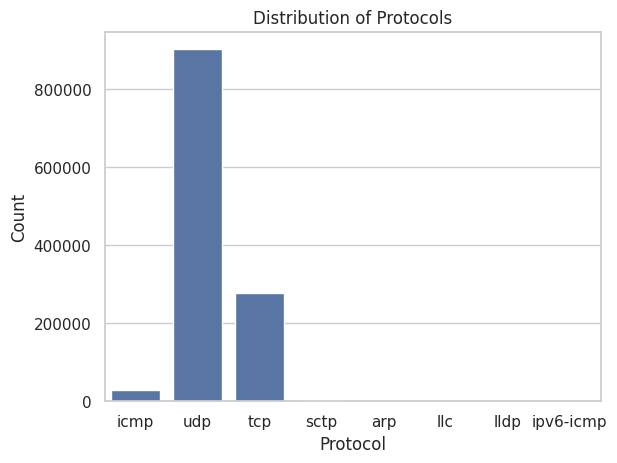

In [58]:
sns.countplot(x='Proto', data=data)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Distribution of Protocols')
plt.show()

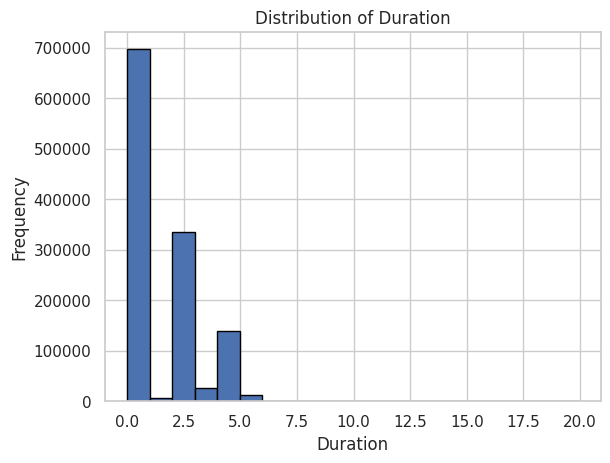

In [59]:
plt.hist(data['Dur'], bins=20, edgecolor='black')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Duration')
plt.show()

In [60]:


# Example for 'Attack Type' column using Plotly Treemap
attack_counts = data['Attack Type'].value_counts().reset_index()
attack_counts.columns = ['Attack Type', 'Count']

fig = px.treemap(attack_counts, path=['Attack Type'], values='Count',
                 title='Distribution of Attack Types')

fig.show()

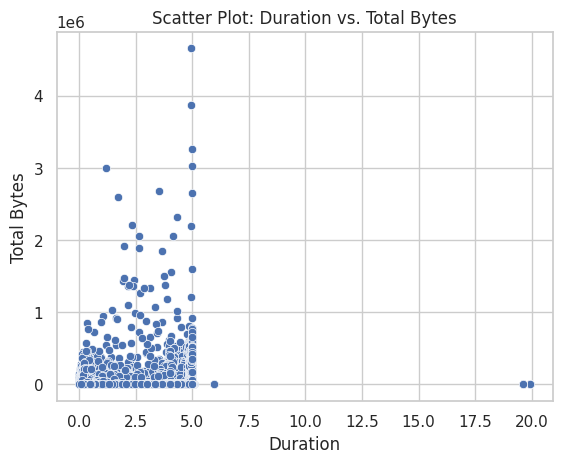

In [61]:
sns.scatterplot(x='Dur', y='TotBytes', data=data)
plt.xlabel('Duration')
plt.ylabel('Total Bytes')
plt.title('Scatter Plot: Duration vs. Total Bytes')
plt.show()

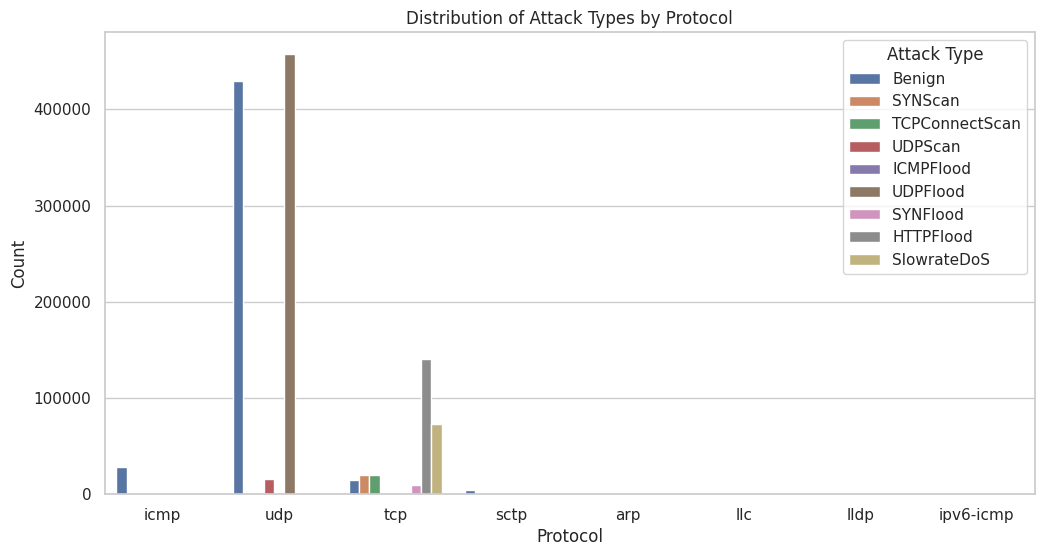

In [63]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Proto', hue='Attack Type', data=data)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Protocol')
plt.legend(title='Attack Type')
plt.show()

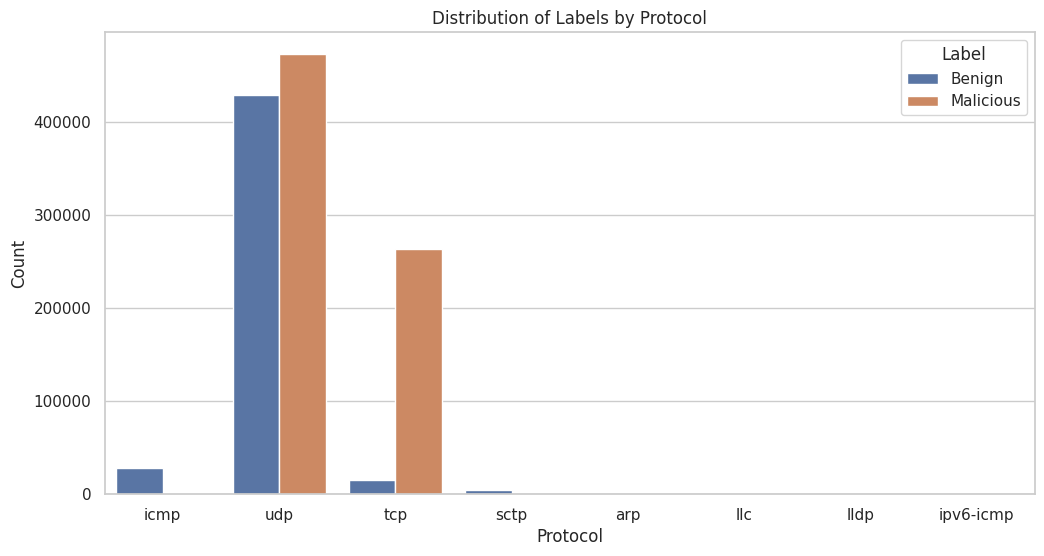

In [64]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Proto', hue='Label', data=data)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Distribution of Labels by Protocol')
plt.legend(title='Label')
plt.show()

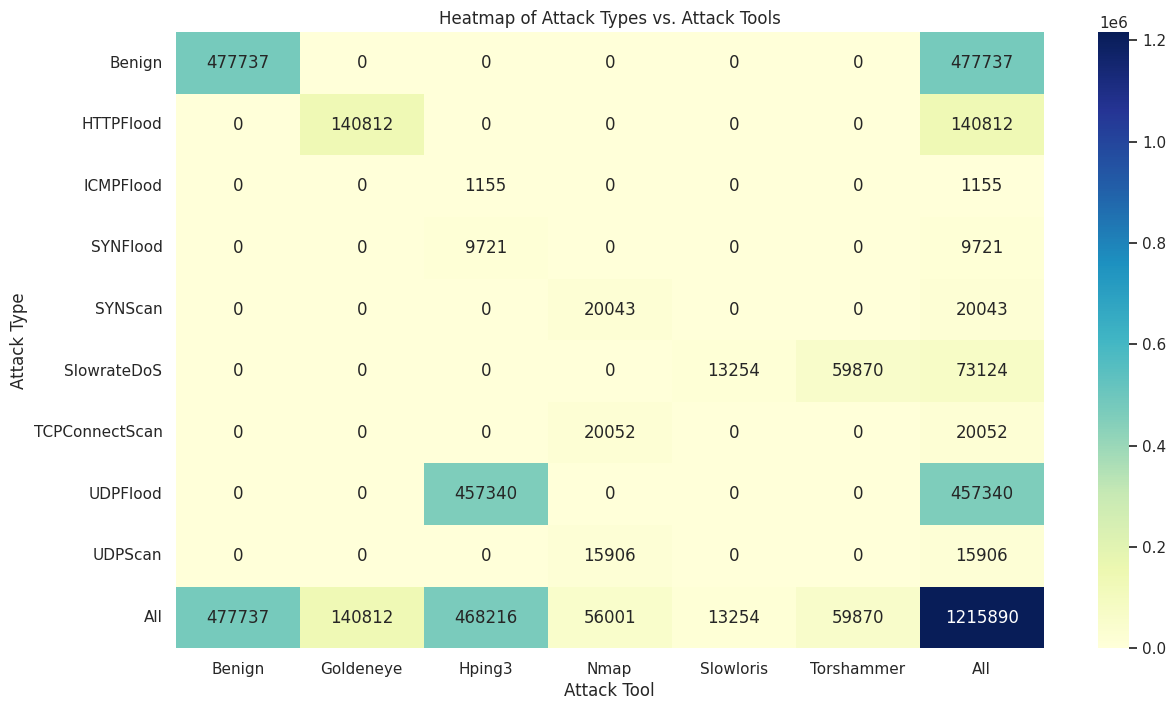

In [66]:
cross_tab = pd.crosstab(data['Attack Type'], data['Attack Tool'], margins=True)

plt.figure(figsize=(14, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d', cbar=True)
plt.xlabel('Attack Tool')
plt.ylabel('Attack Type')
plt.title('Heatmap of Attack Types vs. Attack Tools')
plt.show()